In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data=pd.read_csv('/Users/juyoung/Desktop/코딩테스트/[2021 JOYCITY 인턴공채] 과제전형_데이터사이언스/datascience_rawdata.csv', encoding='utf-8')
data.sort_values(by='userid')

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user
505620,0,200000,1,262,0,2020-09-18,CA,Facebook,6190
393067,0,200001,1,24,0,2020-09-20,US,Instagram,54
556148,0,200002,5,16572,0,2020-09-27,CA,Facebook,12547
556145,4,200002,6,156,0,2020-09-27,CA,Facebook,12547
556146,1,200002,6,5804,0,2020-09-27,CA,Facebook,12547
...,...,...,...,...,...,...,...,...,...
119850,0,399997,11,6510,0,2020-09-09,US,Instagram,0
17714,2,399999,12,3671,0,2020-09-01,RU,Instagram,0
17713,0,399999,2,1571,0,2020-09-01,RU,Instagram,0
17712,1,399999,12,17249,0,2020-09-01,RU,Instagram,0


In [94]:
userid_count=pd.DataFrame(data.groupby(by='userid').size(),columns=['Count'])
userid_count #userid별로 접속 count

,Count
userid,
200000,1
200001,1
200002,4
200003,1
200004,1
...,...
399994,1
399995,1
399997,1


In [132]:
user_sales=pd.DataFrame((data.filter(['userid','sales'])).groupby(by='userid').sum(),columns=['sales'])
user_sales

,sales
userid,
200000,0
200001,0
200002,0
200003,0
200004,0
...,...
399994,0
399995,0
399997,0


In [133]:
marketing=data.filter(['userid','country','marketing_cost_per_user'])
marketing=marketing.drop_duplicates(['userid'],keep='first')
marketing=marketing.sort_values(by='userid')
marketing=marketing.set_index('userid')
marketing['connect']=userid_count
marketing['sales']=user_sales
marketing   #userid 별 marketing 비용과 접속 횟수

,country,marketing_cost_per_user,connect,sales
userid,,,,
200000,CA,6190,1,0
200001,US,54,1,0
200002,CA,12547,4,0
200003,CA,7142,1,0
200004,KR,263,1,0
...,...,...,...,...
399994,DE,0,1,0
399995,CA,9196,1,0
399997,US,0,1,0


In [138]:
#b=marketing[marketing['connect']!=1]
b=marketing.sort_values(by='marketing_cost_per_user')
b=b.drop_duplicates(['marketing_cost_per_user','connect','sales'])
b

,country,marketing_cost_per_user,connect,sales
userid,,,,
300031,EG,0,1,0
311458,US,0,2,0
311457,RU,0,37,1662495
311454,EG,0,3,0
311425,CA,0,17,0
...,...,...,...,...
244265,RU,3466822,1,0
337845,RU,3982429,1,0
242963,RU,4428211,10,0


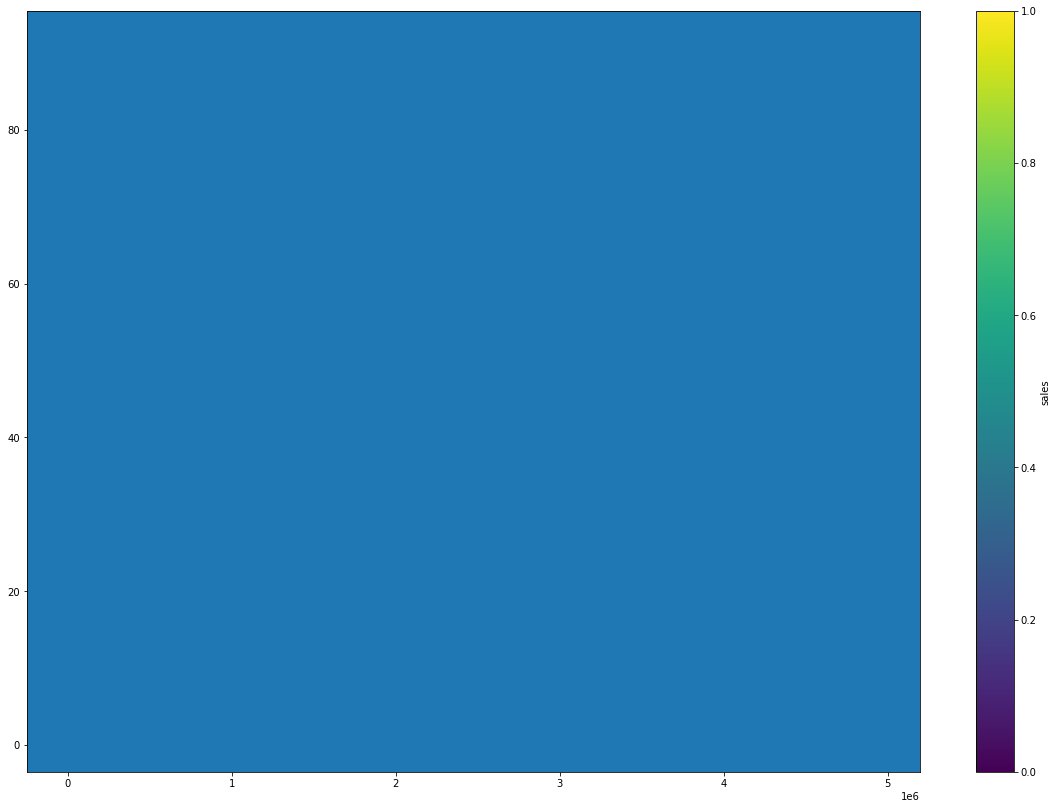

In [145]:
plt.figure(figsize=(20,14))
plt.scatter(b['marketing_cost_per_user'],b['connect'],s=b['sales'])
plt.colorbar(label='sales')
plt.show()

In [61]:
country_count=pd.DataFrame(data.groupby(by='country').size(),columns=['Count'])
country_count['Sales']=(data.filter(['country','sales'])).groupby(by='country').sum()
country_count['Sales_per_user']=country_count['Sales']/country_count['Count']
country_count=country_count.sort_values(by='Sales_per_user')
country_count

,Count,Sales,Sales_per_user
country,,,
IL,2730,73829,27.043590
EG,10769,532935,49.487882
BR,1956,154744,79.112474
TW,15585,4472428,286.970035
US,213681,87607120,409.990219
ID,979,527238,538.547497
FR,25596,23417570,914.891780
KR,31512,32307793,1025.253649
JP,42938,52637912,1225.905072


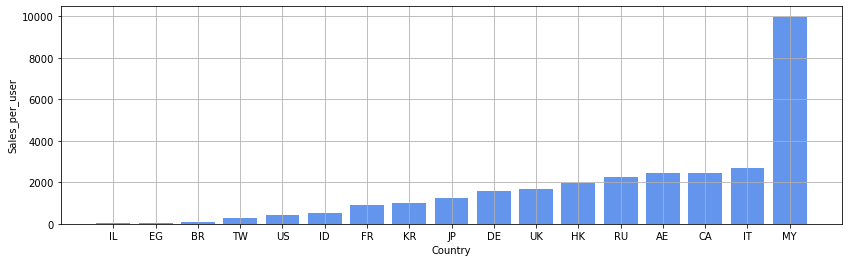

In [69]:
plt.figure(figsize=(14,4))
plt.bar(country_count.index,country_count['Sales_per_user'],color='cornflowerblue')
plt.xlabel('Country')
plt.ylabel('Sales_per_user')
plt.grid(True)
plt.show()